# Actividad 2_8: 

Descarga los dos ficheros adjuntos que encontrarás con la tarea. Uno de ellos contiene un dataset con el precio mensual de la cuenta de Netflix por países. El otro contiene datos sobre los salarios por países. El objetivo de esta actividad es contestar a la siguiente pregunta. ¿Existe relación entre la media o la mediana de los salarios de los países y la cuota mensual que se paga por Netflix?

Debes escribir un programa que realice las siguientes tareas:

1. Importar los dos datasets adjuntos con la tarea y guardarlos en dos Dataframes. Analiza los datos.
2. Crea un DataFrame que incluya una columna con el coste mensual de Netflix, otra con el salario medio y otra con la mediana.
3. Normaliza los datos del DataFrame creado en el punto 3. Normalizar los datos consiste en escalar los valores para que tengan un rango similar. En este caso nos sirve para poder comparar el coste mensual de Netflix con el salario de una persona (que tendrán inicialmente un rango muy distinto). Hay muchos métodos para normalizar. En pandas tenemos algunos métodos que puedes encontrar en el enlace a continuación. Puedes usar uno o probar varios. Si haces esto último debes hacer varios métodos.

https://www.geeksforgeeks.org/normalize-a-column-in-pandas/

4. Finalmente debes pintar una gráfica con los datos por países ya normalizados y contestar a la pregunta. ¿Existe relación entre lo que gana una persona en cada país y lo que debe pagar por Netflix?

In [23]:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt

# 1. Importar los datasets
df_suscripcion = pd.read_csv("Netflix subscription fee Dec-2021.csv")
df_salarios = pd.read_csv("salaries_by_country_2021.csv")

df_unido = df_suscripcion.merge(df_salarios, how="inner", left_on="Country", right_on="country")

# 2. Crear dataframe con coste mensual, salario medio y otra con la mediana.
paises = []
suscripcion = []
salario_medio = []
mediana = []
salario_medio_mes = []

for row in df_unido:
    paises = df_unido["Country"]
    suscripcion = df_unido["Cost Per Month - Standard ($)"]
    salario_medio = df_unido["meanIncome"]
    mediana = df_unido["medianIncome"]
    salario_medio_mes = df_unido["meanIncome"] / 12

df_conjunto = pd.DataFrame({"Country" : paises, "Coste suscripcion / mes" :  suscripcion, "Salario Medio" : salario_medio, "Salario Mensual" : salario_medio_mes, "Mediana" : mediana})
#print(df_conjunto)

# 3. Normalizar los datos consiste en escalar los valores para que tengan un rango similar. 
# En este caso nos sirve para poder comparar el coste mensual de Netflix con el salario de una persona. 
# Hay muchos métodos para normalizar. En pandas tenemos algunos métodos que puedes encontrar en el enlace a continuación. 

df_conjunto["Salario Medio Normalizado"] = (df_conjunto["Salario Medio"] - df_conjunto["Salario Medio"].mean()) / df_conjunto["Salario Medio"].std()
display(df_conjunto)

# 4. Deberemos de buscar relacion entre el salario y lo que cuesta comprar netflix en cada pais.
# Para ello deberemos de buscar la correlacion entre el coste de la suscripcion al mes y el salario medio
datos = df_conjunto[["Salario Mensual", "Coste suscripcion / mes"]]
datos.corr(method="pearson")


,Country,Coste suscripcion / mes,Salario Medio,Salario Mensual,Mediana,Salario Medio Normalizado
0,Argentina,6.30,6935,577.916667,5319,-0.689733
1,Australia,12.12,21329,1777.416667,17076,1.418005
2,Austria,14.67,20718,1726.500000,18405,1.328536
3,Belgium,15.24,17917,1493.083333,16157,0.918380
4,Bolivia,10.99,4787,398.916667,3631,-1.004268
5,Brazil,7.11,7654,637.833333,4559,-0.584448
6,Bulgaria,11.29,7474,622.833333,5696,-0.610806
7,Canada,11.87,22042,1836.833333,18652,1.522411
8,Chile,9.91,9304,775.333333,6293,-0.342836
9,Colombia,6.86,5201,433.416667,3259,-0.943645


,Salario Mensual,Coste suscripcion / mes
Salario Mensual,1.000000,0.699928
Coste suscripcion / mes,0.699928,1.000000


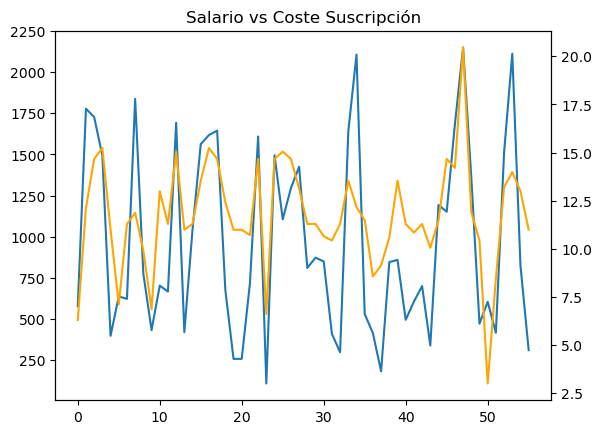

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.title("Salario vs Coste Suscripción") # Título

ax1.plot(df_conjunto["Salario Mensual"]) # Eje X
ax2.plot(df_conjunto["Coste suscripcion / mes"], color="orange") # Eje Y

plt.show() # Mostrar gráfica
